In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 导入数据
testSet = pd.read_table('testSet.txt',header = None)

In [5]:
testSet.head()

,0,1
0,10.235186,11.321997
1,10.122339,11.810993
2,9.190236,8.904943
3,9.306371,9.847394
4,8.330131,8.340352


In [6]:
testSet.shape

(1000, 2)

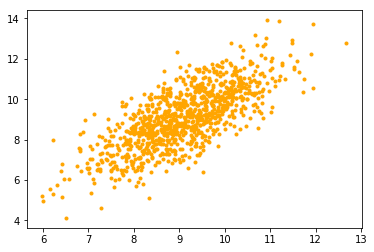

In [7]:
# 查看原始数据分布
plt.scatter(testSet.iloc[:,0],testSet.iloc[:,1],marker = '.', c = 'orange')

In [10]:
# 去均值化，将数据均值变为0
dataSet = testSet
meanVals = dataSet.mean(0)
# 将每一列的数据都减去当前列的均值
meanRemoved = dataSet - meanVals

In [11]:
meanVals

0    9.063936
1    9.096002
dtype: float64

In [14]:
meanRemoved.head()

,0,1
0,1.171250,2.225995
1,1.058403,2.714991
2,0.126300,-0.191059
3,0.242435,0.751392
4,-0.733805,-0.755650


In [16]:
# numpy 中的cov函数（）可以直接计算协方差
# 注意：cov（x,0） = cov(x) 除数是n-1（n为样本个数），cov（x，1）除数是n
# 计算协方差矩阵
covMat = np.mat(np.cov(meanRemoved,rowvar = 0))

In [17]:
covMat

matrix([[1.05198368, 1.1246314 ],
        [1.1246314 , 2.21166499]])

In [18]:
# 计算方差矩阵的特征值和右特征向量
eigVals , eigVects = np.linalg.eig(covMat)

In [19]:
eigVals

array([0.36651371, 2.89713496])

In [20]:
eigVects

matrix([[-0.85389096, -0.52045195],
        [ 0.52045195, -0.85389096]])

In [22]:
# 对特征值进行排序，argsort（）函数默认从小到大排序
eigValInd = np.argsort(eigVals)
# 提取出最大的N个特征
N = 1
eigValInd = eigValInd[:-(N+1):-1]

In [24]:
eigValInd = np.argsort(eigVals)

In [25]:
eigValInd

array([0, 1], dtype=int64)

In [26]:
# 提取出最大的N个特征
N = 1
eigValInd = eigValInd[:-(N+1):-1]

In [27]:
eigValInd

array([1], dtype=int64)

In [28]:
# 根据特征值最大的N个特征值对应的索引，提取相应的特征向量，组成压缩矩阵
redEigVects = eigVects[:,eigValInd]

In [29]:
redEigVects

matrix([[-0.52045195],
        [-0.85389096]])

In [30]:
# 将去除均值后的数据矩阵*压缩矩阵，转换到新的空间，使维度降低为N
lowDDataMat = np.mat(meanRemoved) * redEigVects

In [33]:
lowDDataMat[:5]

matrix([[-2.51033597],
        [-2.86915379],
        [ 0.09741085],
        [-0.76778222],
        [ 1.02715333]])

In [35]:
#利用降维后的矩阵反构出原数据矩阵（用作测试，可跟为压缩的原矩阵对比）
reconMat = (lowDDataMat * redEigVects.T) + np.mat(meanVals)

In [38]:
'''
函数功能：实现PCA降维
参数说明：
    dataSet:原始数据集
    N：希望数据降为N维
返回：
    lowDDataMat：降维之后的矩阵
    reconMat：重构之后的数据
'''
def PCA(dataSet , N = 9999999):
    # 按列计算当前属性的均值
    meanVals = dataSet.mean(0)
    # 去均值化，将数据均值变为0
    meanRemoved = dataSet - meanVals
    # 计算协方差矩阵（注意：cov（x,0） = cov(x) 除数是n-1（n为样本个数），cov（x，1）除数是n）
    covMat = np.mat(np.cov(meanRemoved,rowvar= 0))
    # 计算方差矩阵的特征值和右特征向量
    eigVals , eigVects = np.linalg.eig(covMat)
    # 对特征值进行排序，argsort（）函数默认从小到大排序
    eigValInd = np.argsort(eigVals)
    # 提取出最大的N个特征
    eigValInd = eigValInd[:-(N+1):-1]
    # 根据特征值最大的N个特征值对应的索引，提取相应的特征向量，组成压缩矩阵
    redEigVects = eigVects[:,eigValInd]
    # 将去除均值后的数据矩阵*压缩矩阵，转换到新的空间，使维度降低为N
    lowDDataMat = np.mat(meanRemoved) * redEigVects
    #利用降维后的矩阵反构出原数据矩阵（用作测试，可跟为压缩的原矩阵对比）
    reconMat = (lowDDataMat * redEigVects.T) + np.mat(meanVals)
    return lowDDataMat , reconMat

# 利用PCA对半导体数据进行降维

In [39]:
secom = pd.read_table('secom.data',sep=' ',header= None)

In [40]:
secom.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [41]:
secom.shape

(1567, 590)

In [43]:
# 删除缺失值大于等于80%的特征
secom1 = secom.copy()
nanInd = []
for i in range(secom1.shape[1]):
    nan = np.isnan(secom1.iloc[:,i]).mean()
    if nan * 100 >= 80:
        print(f'第{i}列的缺失值比例为{round(nan*100,2)}%')
        nanInd.append(i)
secom1.drop(secom1.columns[nanInd],axis = 1,inplace = True)

第85列的缺失值比例为85.58%
第157列的缺失值比例为91.19%
第158列的缺失值比例为91.19%
第220列的缺失值比例为85.58%
第292列的缺失值比例为91.19%
第293列的缺失值比例为91.19%
第358列的缺失值比例为85.58%
第492列的缺失值比例为85.58%


In [44]:
# 缺失值比例小于80%的特征用均值填充
for i in secom1.columns:
    secom1[i].fillna(secom1[i].mean(),inplace = True)